In [17]:
import networkx as nx
G = nx.Graph()
import matplotlib.pyplot as plt
%matplotlib inline

Центр графа: [1, 2]
Радиус графа: 1
Диаметр графа: 2


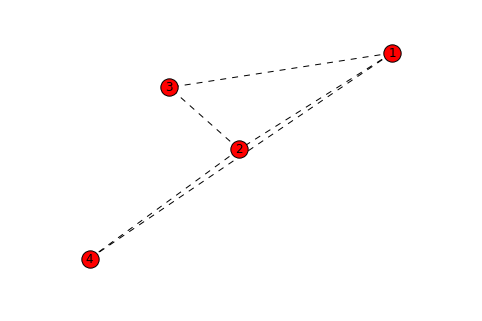

In [11]:
#центр графа - множество всех вершин A, для которой максимальное расстояние d(A,B) до других вершин B минимально
#Эксцентриситет вершины графа – расстояние до максимально удаленной от нее вершины. 
#Радиус графа – минимальный эксцентриситет вершин, а диаметр графа – максимальный эксцентриситет вершин.
DG=nx.Graph()
DG.add_weighted_edges_from([(1,2,7), (3,1,1),(4,1,2),(2,3,5),(2,4,6)])
nx.draw(DG, with_labels = True,style='dashed')
print ('Центр графа:',nx.center(DG))
print ('Радиус графа:',nx.radius(DG))
print ('Диаметр графа:',nx.diameter(DG))

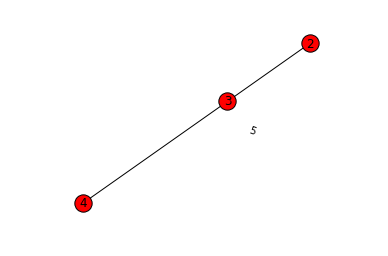

In [25]:
import pylab
G.add_nodes_from([2,3,4])
G.add_edge(3, 2)
G.add_edge(3,4)
edge_labels={(3,2):'5',(3,4):'6'}
pos=nx.spring_layout(G)
nx.draw_networkx_edge_labels(G,pos=pos,edge_labels=edge_labels)
nx.draw(G,with_labels = True)
pylab.show()

В ноду 1 входит 3 ребер
В ноду 1 входит 3 весов
Все ребра [(1, 2), (3, 1), (4, 1)]
Из ноды 4 идут ребра в ноды: [1]
В ноду 1 приходят ребра из нод: [3, 4]
Проверка содержит ли граф ноду 4: True
Количество нод в графе: 4
Количество ребер в графе: 3
Транзитивность: 0.0
Есть путь из 1 в 2: True


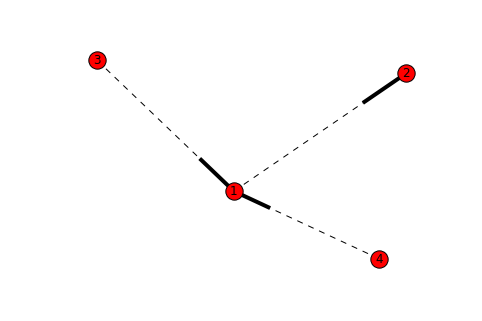

In [32]:
#Directed graphs
DG=nx.DiGraph()
DG.add_weighted_edges_from([(1,2,0.5), (3,1,1),(4,1,2)])
nx.draw(DG, with_labels = True,style='dashed')
print ('В ноду 1 входит %d ребер' % DG.degree(1))
print ('В ноду 1 входит %d весов' % DG.degree(1,weight='weight'))
print ('Все ребра',DG.edges())
print ('Из ноды 4 идут ребра в ноды:',DG.successors(4))
print ('В ноду 1 приходят ребра из нод:',DG.predecessors(1))
print ('Проверка содержит ли граф ноду 4:',DG.has_node(4))
print ('Количество нод в графе:',DG.order())
print ('Количество ребер в графе:',DG.size())
print ('Транзитивность:',nx.transitivity(DG))
print ('Есть путь из 1 в 2:',nx.has_path(DG,1,2))


In [16]:
#конвертация направленного графа в ненаправленный
H = nx.Graph(DG)
#nx.draw(H, with_labels = True)

['a', 'c', 'd']
1.7


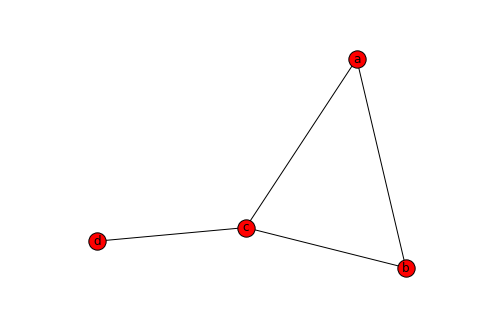

In [5]:
#алгоритм Дейкстры
G=nx.Graph()
e=[('a','b',0.3),('b','c',0.9),('a','c',0.5),('c','d',1.2)]
G.add_weighted_edges_from(e)
print(nx.dijkstra_path(G,'a','d'))
print( nx.dijkstra_path_length(G, 'a', 'd'))
nx.draw(G, with_labels = True)

In [29]:
#аналог алгоритма Дейкстры - кратчайшее расстояние
G=nx.Graph()
e=[('a','b',0.3),('b','c',0.9),('a','c',0.5),('c','d',1.2)]
G.add_weighted_edges_from(e)
print(nx.shortest_path(G,'a','d'))
print(nx.shortest_path_length(G,'a','d'))

['a', 'c', 'd']
2


In [36]:
#алгоритм Флойда-Уоршала
G=nx.Graph()
e=[('a','b',0.3),('b','c',0.9),('a','c',0.5),('c','d',1.2)]
G.add_weighted_edges_from(e)
print(nx.floyd_warshall(G,weight='weight'))

{'d': defaultdict(<function floyd_warshall_predecessor_and_distance.<locals>.<lambda>.<locals>.<lambda> at 0x0848E738>, {'d': 0, 'b': 2.0, 'c': 1.2, 'a': 1.7}), 'b': defaultdict(<function floyd_warshall_predecessor_and_distance.<locals>.<lambda>.<locals>.<lambda> at 0x0848E588>, {'d': 2.0, 'b': 0, 'c': 0.8, 'a': 0.3}), 'c': defaultdict(<function floyd_warshall_predecessor_and_distance.<locals>.<lambda>.<locals>.<lambda> at 0x0848E6F0>, {'d': 1.2, 'b': 0.8, 'c': 0, 'a': 0.5}), 'a': defaultdict(<function floyd_warshall_predecessor_and_distance.<locals>.<lambda>.<locals>.<lambda> at 0x0848E540>, {'d': 1.7, 'b': 0.3, 'c': 0.5, 'a': 0})}


In [27]:
#поиск всех путей от одной ноды к другой
G=nx.Graph()
e=[('a','b',0.3),('b','c',0.9),('a','c',0.5),('c','d',1.2)]
G.add_weighted_edges_from(e)
print(list(nx.all_simple_paths(G,'d','a')))

[['d', 'c', 'a'], ['d', 'c', 'b', 'a']]


[[1, 2, 4], [1, 2, 3]]
[(1, 2, 'forward'), (2, 3, 'forward'), (3, 1, 'forward')]


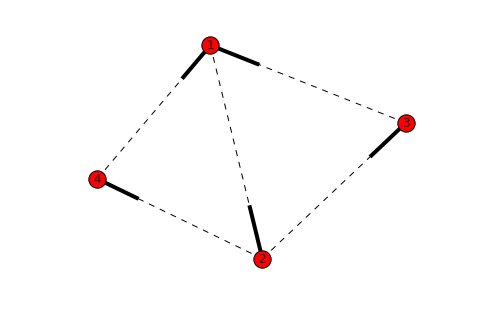

In [22]:
#Поиск циклов в направленных графах
DG=nx.DiGraph()
DG.add_weighted_edges_from([(1,2,0.5), (3,1,1),(4,1,2),(2,4,1),(2,3,1)])
nx.draw(DG, with_labels = True,style='dashed')
print(list(nx.simple_cycles(DG)))
print (list(nx.find_cycle(DG, orientation='ignore')))

In [23]:
#построение минимального остовного дерева по алгоритму Крускала. 
#A minimum spanning tree is a subgraph of the graph (a tree) with the minimum sum of edge weights. 
G=nx.Graph()
G.add_weighted_edges_from([(1,2,0.5),(4,1,2),(2,4,1),(2,3,1)])
#nx.draw(G, with_labels = True)
n=list(nx.minimum_spanning_tree(G).edges(data=False)) #ребра остовного дерева
print (n)
G1=nx.Graph()
G1.add_edges_from(n)
#nx.draw(G1, with_labels = True)

[(1, 2), (2, 3), (2, 4)]


In [69]:
#определяем макс пропускную способность графа. например если граф это водопровод, то сколько макс может течь воды из 1 в 8
#используется алгоритм Форда-Фалкерсона
DG=nx.DiGraph()
DG.add_weighted_edges_from([(1,2,6), (2,4,4),(4,6,4),(6,8,7),(1,3,6),(3,5,9),(5,7,7),(7,8,4),(3,2,5),(2,5,2),(5,4,8),(4,7,2),(7,6,11)])
pos = nx.spring_layout(DG)
pos=nx.spring_layout(DG)
#nx.draw(DG, with_labels = True,pos=pos)
print (nx.maximum_flow(DG,1,8,capacity='weight'))
#ответ - 11. Дальше расписаны потоки для такого решения

(11, {1: {2: 5, 3: 6}, 2: {4: 3, 5: 2}, 3: {2: 0, 5: 6}, 4: {6: 3, 7: 1}, 5: {4: 1, 7: 7}, 6: {8: 7}, 7: {8: 4, 6: 4}, 8: {}})


In [65]:
#для задачи выше - определяем где можно повысить мощность для повышения потока
cut_value, partition = nx.minimum_cut(DG, 1, 8,capacity='weight')
reachable, non_reachable = partition
cutset = set()
for u, nbrs in ((n, DG[n]) for n in reachable):
    cutset.update((u, v) for v in nbrs if v in non_reachable)
print(sorted(cutset))

[(6, 8), (7, 8)]


Все клики в графе: [[1], [2], [3], [4], [5], [6], [7], [8], [1, 2], [1, 3], [2, 3], [2, 4], [2, 5], [3, 5], [4, 5], [4, 6], [4, 7], [4, 8], [5, 7], [6, 7], [6, 8], [7, 8], [1, 2, 3], [2, 3, 5], [2, 4, 5], [4, 5, 7], [4, 6, 7], [4, 6, 8], [4, 7, 8], [6, 7, 8], [4, 6, 7, 8]]
Максимальные клики в графе: [[1, 2, 3], [3, 5, 2], [4, 2, 5], [4, 7, 8, 6], [4, 7, 5]]
Размер максимальной клики в графе: 4


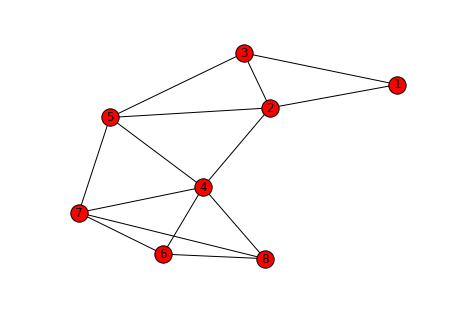

In [28]:
#нахождение клик в графах. 
#Кликой в неориентированном графе называется подмножество вершин, каждые две из которых соединены ребром графа
#
DG=nx.Graph()
DG.add_edges_from([(1,2), (2,4),(4,6),(6,8),(1,3),(3,5),(5,7),(7,8),(3,2),(2,5),(5,4),(4,7),(7,6),(8,4)])
pos = nx.spring_layout(DG)
pos=nx.spring_layout(DG)
nx.draw(DG, with_labels = True,pos=pos)
print ('Все клики в графе:',list(nx.enumerate_all_cliques(DG)))
print ('Максимальные клики в графе:',list(nx.find_cliques(DG))) #алгоритм Брона-Кербоша
print ('Размер максимальной клики в графе:',nx.graph_clique_number(DG))

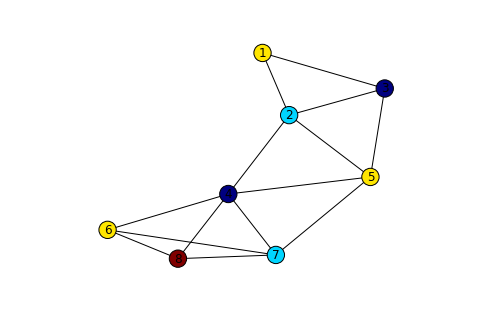

In [25]:
#задача - разукрасить ноды в цвета, несмежные с соседними нодами
d = nx.coloring.greedy_color(DG, strategy=nx.coloring.strategy_largest_first) #словарь нод и цветов. Есть разные стратегии
values = [d.get(node, 0.25) for node in DG.nodes()]
nx.draw(DG, with_labels = True,node_color=values)

In [14]:
#Венгерский алгорим (алгоритм Куна Harold Kuhn)
#Используется для минимизации затрат
#например есть матрица человек-рабочее место. Каждое число - это зп которую будет получать человек на 1 из 4 мест
#наша задача распределить людей по местам так, чтобы минимизировать стоимость
import numpy as np
from scipy.optimize import linear_sum_assignment
cost = np.array([[1,7,1,3], [1,6,4,6], [17,1,5,1],[1,6,10,4]])
row_ind, col_ind = linear_sum_assignment(cost)
print ('Индексы оптимальных позиций',col_ind) #начинаем с 0
print ('Суммарная стоимость',cost[row_ind, col_ind].sum())

[2 0 1 3]
7


True
[(0, 4), (4, 3), (3, 2), (2, 4), (4, 1), (1, 3), (3, 0), (0, 2), (2, 1), (1, 0)]
[(1, 4), (4, 3), (3, 2), (2, 4), (4, 0), (0, 3), (3, 1), (1, 2), (2, 0), (0, 1)]
[0, 4, 3, 2, 4, 1, 3, 0, 2, 1]


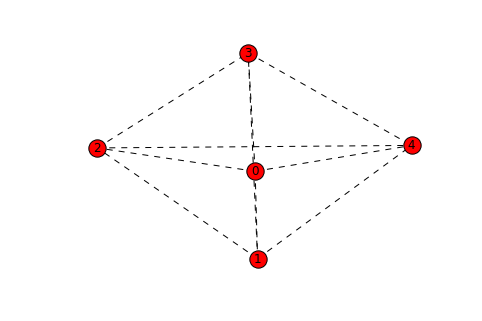

In [36]:
#Эйлеров граф - пройти по всем ребрам за 1 раз
G=nx.complete_graph(5)
nx.draw(G, with_labels = True,style='dashed')
print (nx.is_eulerian(G))
print (list(nx.eulerian_circuit(G)))
print (list(nx.eulerian_circuit(G,source=1)))
print ([u for u,v in nx.eulerian_circuit(G)])  # nodes in circuit

1


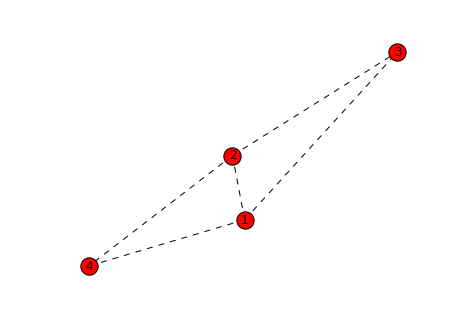

In [37]:
DG=nx.Graph()
DG.add_weighted_edges_from([(1,2,7), (3,1,1),(4,1,2),(2,3,5),(2,4,6)])
nx.draw(DG, with_labels = True,style='dashed')
print (nx.number_connected_components(DG))

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
DG=nx.Graph()
DG.add_weighted_edges_from([(1,2,7), (3,1,1),(4,1,2),(2,3,5),(2,4,6)])
nx.draw(DG, with_labels = True,style='dashed')
print (nx.number_connected_components(DG))

1


C:\ProgramData\Anaconda\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):
